# Script de test

In [1]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

test = pd.read_csv('./defi-ia-2023/test_set2.csv')
test.head()

,nb_requete,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,1,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,1,vilnius,21,romanian,0,1,187,32
2,1,2,1,vilnius,21,romanian,0,1,279,12
3,1,3,1,vilnius,21,romanian,0,1,395,10
4,1,4,1,vilnius,21,romanian,0,1,488,42


In [2]:
hotels = pd.read_csv('./defi-ia-2023/features_hotels.csv', index_col=['hotel_id', 'city'])
test = test.join(hotels, on=['hotel_id', 'city'])
test.head()

,nb_requete,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,1,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,1,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,1,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,1,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [5]:
#len(test)

In [6]:
#test.dtypes

In [7]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
test["group"]=pd.Categorical(test["group"],ordered=False)
test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
test["parking"]=pd.Categorical(test["parking"],ordered=False)
test["pool"]=pd.Categorical(test["pool"],ordered=False)
test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

test.dtypes
#test.head()

nb_requete            int64
index                 int64
order_requests        int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
hotel_id           category
stock                 int64
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

In [8]:
test.describe()

,nb_requete,index,order_requests,date,stock
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000
mean,1.556592,3321.500000,419.312763,15.201084,23.766105
std,0.549755,1918.101926,246.445963,13.783346,32.582240
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1660.750000,202.000000,3.000000,2.000000
50%,2.000000,3321.500000,415.500000,15.000000,8.000000
75%,2.000000,4982.250000,636.000000,21.000000,33.000000
max,3.000000,6643.000000,844.000000,40.000000,199.000000


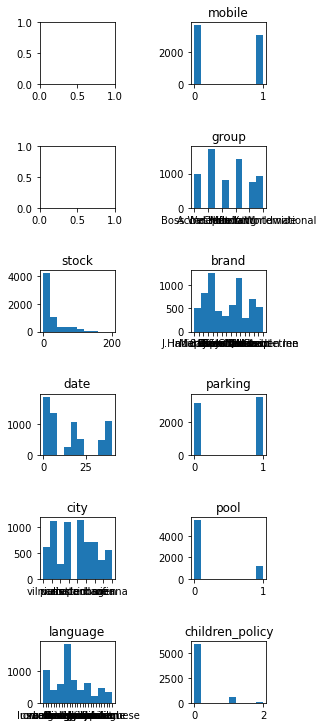

In [9]:
# Tracé des histogrammes
cm = 1/2.54
fig, ax = plt.subplots(6,2,figsize=(10*cm, 30*cm))
#ax[0,0].hist(test["price"])
#ax[0,0].set_title('price')
#ax[1,0].hist(test["nb_requete"])
#ax[1,0].set_title('nb_requete')
ax[2,0].hist(test["stock"])
ax[2,0].set_title('stock')
ax[3,0].hist(test["date"])
ax[3,0].set_title('date')
ax[4,0].hist(test["city"])
ax[4,0].set_title('city')
ax[5,0].hist(test["language"])
ax[5,0].set_title('language')
ax[0,1].hist(test["mobile"])
ax[0,1].set_title('mobile')
ax[1,1].hist(test["group"])
ax[1,1].set_title('group')
ax[2,1].hist(test["brand"])
ax[2,1].set_title('brand')
ax[3,1].hist(test["parking"])
ax[3,1].set_title('parking')
ax[4,1].hist(test["pool"])
ax[4,1].set_title('pool')
ax[5,1].hist(test["children_policy"])
ax[5,1].set_title('children_policy')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

## AJOUTER UNE COLONNE AVEC LA VARIABLE NOMBRE DE REQUETES